# Attrition | impact attrition and prediction


This dataset was created to explore the diverse factors impacting employee performance and satisfaction in a typical organization. It spans a variety of fields from personal demographics to performance metrics and job details, offering a comprehensive view into the dynamics of the workplace.

What is Attrition?

Attrition in the workplace, a persistent challenge for many organizations, represents the rate at which employees........

This phenomenon poses significant problems for companies like IBM and others in the tech industry. When experienced employees depart, companies face not only the loss of valuable institutional knowledge and skills but also the high costs and resource-intensive process associated with recruiting, hiring, and training new personnel.

Moreover, a high attrition rate can tarnish a company's reputation as an employer, making it increasingly difficult to attract top talent in a competitive job market. Understanding and addressing the root causes of attrition is thus crucial for maintaining a skilled, stable, and motivated workforce.



# Context | Business Impact

Understanding when and why employees are likely to leave can inform strategies to boost employee retention and facilitate preemptive hiring planning. I will be using a systematic, step-by-step approach suitable for various machine learning problems. This project would fall under what is commonly known as "HR Anlytics", "People Analytics".

In this study, we will attempt to solve the following problem statement is:

- What is the likelihood of an active employee leaving the company?
- What are the key indicators of an employee leaving the company?
- What policies or strategies can be adopted based on the results to improve employee retention?
- What are the patters associated to employee productivity and attrition?
- How can we predict employee turnover?
- Factors that reflects job satisfaction? On top from survey, Check insights data (other features) and externally
- How can we retain employees? 
Combine info externally + insight model prediction (variants)

Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.

# Table of Contents

1. Data preprocessing | Context

2. EDA

3. Data Processing

4. ML Modeling

5. Conclusion

# About the dataset scoring values (1 to 5)

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio 
import sys
import os 
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import joblib
import pickle

In [4]:
import warnings

# Suppress FutureWarning from seaborn
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
data=pd.read_csv('Base-HR-Employee-Attrition.csv')

In [7]:
# Set Pandas display options to show all columns
pd.set_option('display.max_columns', None)

display(data.head())


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
data.shape

(1470, 35)

In [11]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  0


# Data Cleaning

I don't see missing values, no duplicates. 
I will later on drop the columns aren't relevant for the analysis. And perhaps create groups to convert numerical columns in numericals. 


In [12]:
# Rename columns to lowercase with underscores
data.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)


In [13]:
#Checking for unique values. If so, we don't need them for our analysis
unique_value_columns = [col for col in data.columns if data[col].nunique() == 1]
unique_value_columns

['employeecount', 'over18', 'standardhours']

- These columns can be dropped as the only have one unique value

In [14]:
data = data.drop(columns=unique_value_columns, axis=1)
data = data.drop(columns=["employeenumber"], axis=1)

data.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [15]:
# We will also drop those columns that aren't relevant for our analysis. StockOptionLevel 
data=data.drop(['stockoptionlevel'], axis=1)
data

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,17,3,2,9,6,0,8


In [16]:
data.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

# Exploratory Data Analysis (EDA) 

- Let's look at the general values of attrition distribution (%) and the total counts. Considering we have 1470 employees.

In [17]:
total_employees = len(data)

# number of employees with attrition (Yes) and without attrition (No)
attrition_counts = data['attrition'].value_counts()

# Extract counts for Yes and No
attrition_yes = attrition_counts['Yes'] if 'Yes' in attrition_counts else 0
attrition_no = attrition_counts['No'] if 'No' in attrition_counts else 0

# percentage of attrition
percentage_yes = (attrition_yes / total_employees) * 100
percentage_no = (attrition_no / total_employees) * 100

print("Total number of employees:", total_employees)
print("Number of employees with attrition (Yes):", attrition_yes)
print("Number of employees without attrition (No):", attrition_no)
print("Percentage of employees with attrition:", percentage_yes)
print("Percentage of employees without attrition:", percentage_no)

Total number of employees: 1470
Number of employees with attrition (Yes): 237
Number of employees without attrition (No): 1233
Percentage of employees with attrition: 16.122448979591837
Percentage of employees without attrition: 83.87755102040816


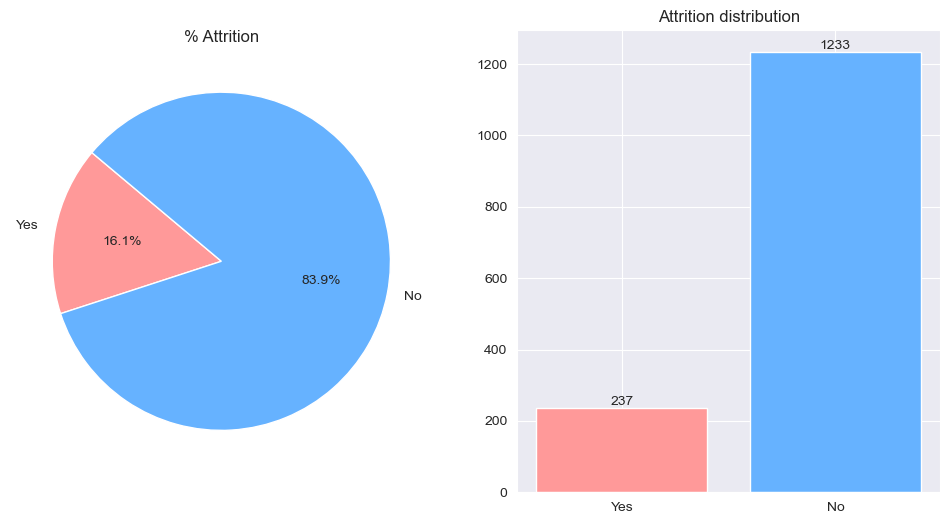

In [18]:
# Targeting the most important variable(feature); Attrition 
import matplotlib.pyplot as plt
import seaborn as sns


attrition_labels = ['Yes', 'No']
attrition_counts = [attrition_yes, attrition_no]
pie_colors = ['#FF9999', '#66B2FF']  # Reversed colors for Yes and No
bar_colors = ['#FF9999', '#66B2FF']  # Red for Yes, blue for No


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Pie chart for Attrition distribution
ax[0].pie(attrition_counts, labels=attrition_labels, colors=pie_colors, autopct='%1.1f%%', startangle=140)
ax[0].set_title("% Attrition")

# Plot 2: Bar chart for Attrition distribution
ax[1].bar(attrition_labels, attrition_counts, color=bar_colors)
for bars in ax[1].containers:
    ax[1].bar_label(bars)

ax[1].set_title("Attrition distribution")

plt.show()



# As shown on the chart above, we see this is an imbalanced class problem. 

- The percentage of Current Employees in our dataset is 83.9% and the percentage of former employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. 
We will have to address this target feature imbalance (feature engineering section) prior to implementing our Machine Learning algorithms.

- Let's keep observing our dataset and correlation attrition with other features(variables)

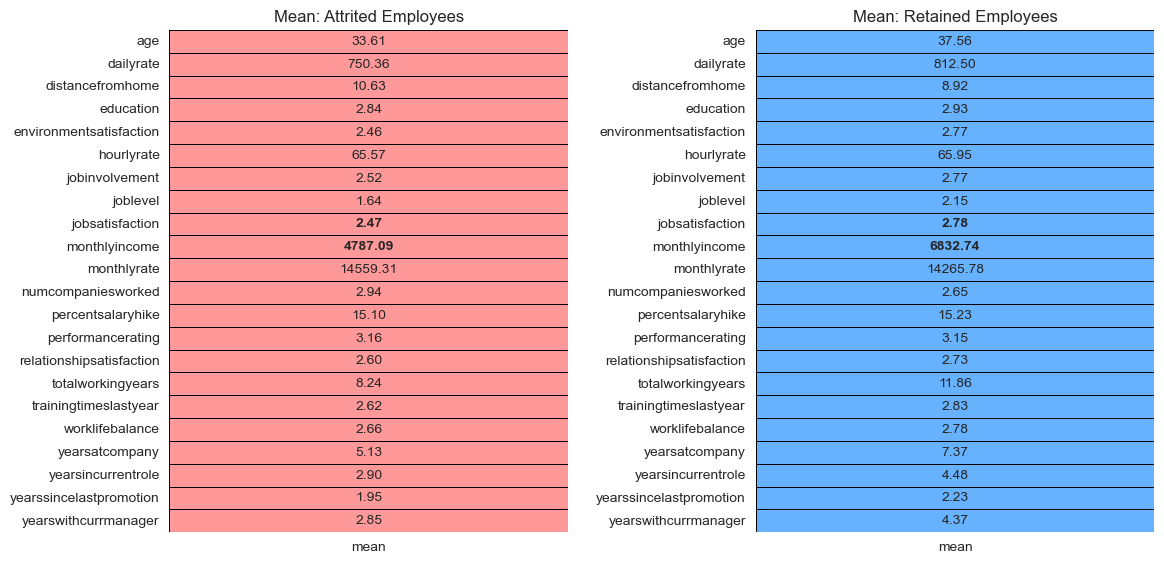

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


yes = data[data['attrition'] == 'Yes'].describe().T
no = data[data['attrition'] == 'No'].describe().T

# Defining color palettes
yes_palette = ['#FF9999']  # Light red for Attrited Employees
no_palette = ['#66B2FF']  # Light blue for Retained Employees

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Attrited Employees
plt.subplot(1, 2, 1)
ax1 = sns.heatmap(yes[['mean']], annot=True, cmap=yes_palette, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Mean: Attrited Employees')

# Highlighting specific rows
highlight_rows_yes = ['monthlyincome', 'monthlyrate']
for row in highlight_rows_yes:
    row_index = yes.index.get_loc(row)
    ax1.get_children()[row_index].set_fontweight('bold')

# Plot for Retained Employees
plt.subplot(1, 2, 2)
ax2 = sns.heatmap(no[['mean']], annot=True, cmap=no_palette, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Mean: Retained Employees')


highlight_rows_no = ['monthlyincome', 'monthlyrate']
for row in highlight_rows_no:
    row_index = no.index.get_loc(row)
    ax2.get_children()[row_index].set_fontweight('bold')


fig.tight_layout(pad=2)
plt.show()




* When considering age, mean values of retained employees is 37 i.e more than the attrited employess, 33.
* DailyRate & JobLevel is higher for retained(active) employees than departing employees.
* Monthly Income is in average higher on retained(active) employees with 6,832 vs attrited (former employees) 4,787



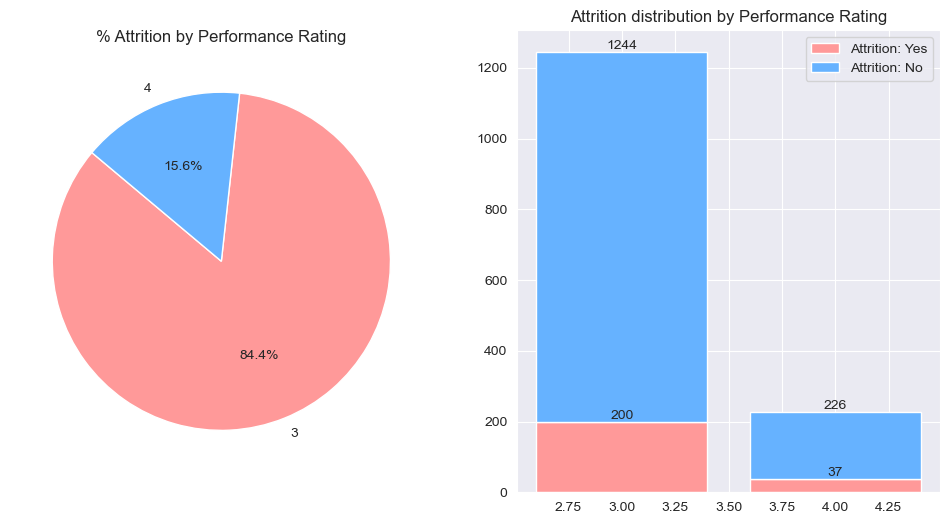

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


attrition_performance_counts = data.groupby(['attrition', 'performancerating']).size()


attrition_yes_counts = attrition_performance_counts['Yes']
attrition_no_counts = attrition_performance_counts['No']


attrition_labels = ['Yes', 'No']
performance_ratings = sorted(data['performancerating'].unique())

attrition_yes_rating_counts = [attrition_yes_counts[rating] if rating in attrition_yes_counts else 0 for rating in performance_ratings]
attrition_no_rating_counts = [attrition_no_counts[rating] if rating in attrition_no_counts else 0 for rating in performance_ratings]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Pie chart for Attrition distribution by PerformanceRating
ax[0].pie(attrition_yes_rating_counts, labels=performance_ratings, colors=pie_colors, autopct='%1.1f%%', startangle=140)
ax[0].set_title("% Attrition by Performance Rating")

# Plot 2: Bar chart for Attrition distribution by PerformanceRating
ax[1].bar(performance_ratings, attrition_yes_rating_counts, color=bar_colors[0], label='Attrition: Yes')
ax[1].bar(performance_ratings, attrition_no_rating_counts, color=bar_colors[1], bottom=attrition_yes_rating_counts, label='Attrition: No')

# Annotate the bars with counts
for bars in ax[1].containers:
    ax[1].bar_label(bars)

ax[1].set_title("Attrition distribution by Performance Rating")
ax[1].legend()

plt.show()


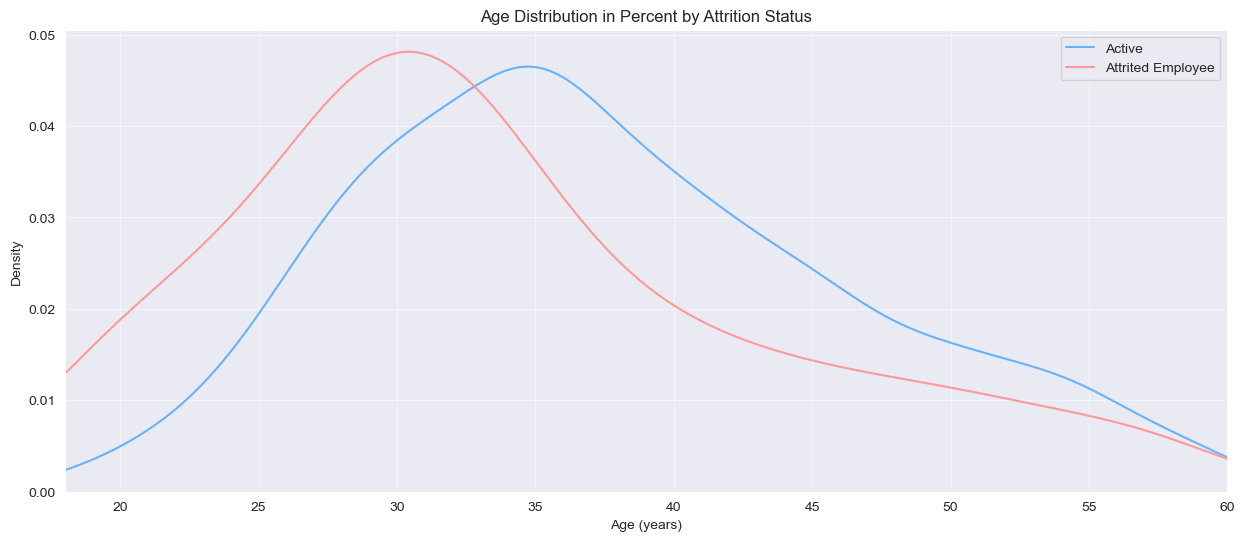

In [21]:
# Looking at correlation with Age. 

palette = ['#66B2FF', '#FF9999']  

plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)

# Plot KDE plot with specified palette
sns.kdeplot(data.loc[data['attrition'] == 'No', 'age'], label='Active', color=palette[0])
sns.kdeplot(data.loc[data['attrition'] == 'Yes', 'age'], label='Attrited Employee', color=palette[1])

plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status')

plt.show()


* It seems that younger employees are more likely to leave the company.

In [22]:
# Looking at gender distribution at the company. Aprox. 40% female and 60% male

total = data["gender"].value_counts()
total

gender
Male      882
Female    588
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

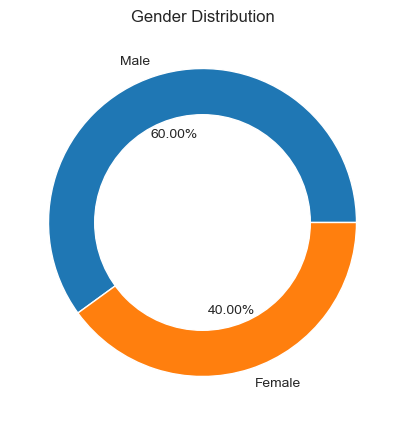

In [23]:
my_circle=plt.Circle( (0,0), 0.7, color='white') 

plt.figure(figsize=(5,5))

plt.pie(total.values,
        labels = total.index,
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Gender Distribution')

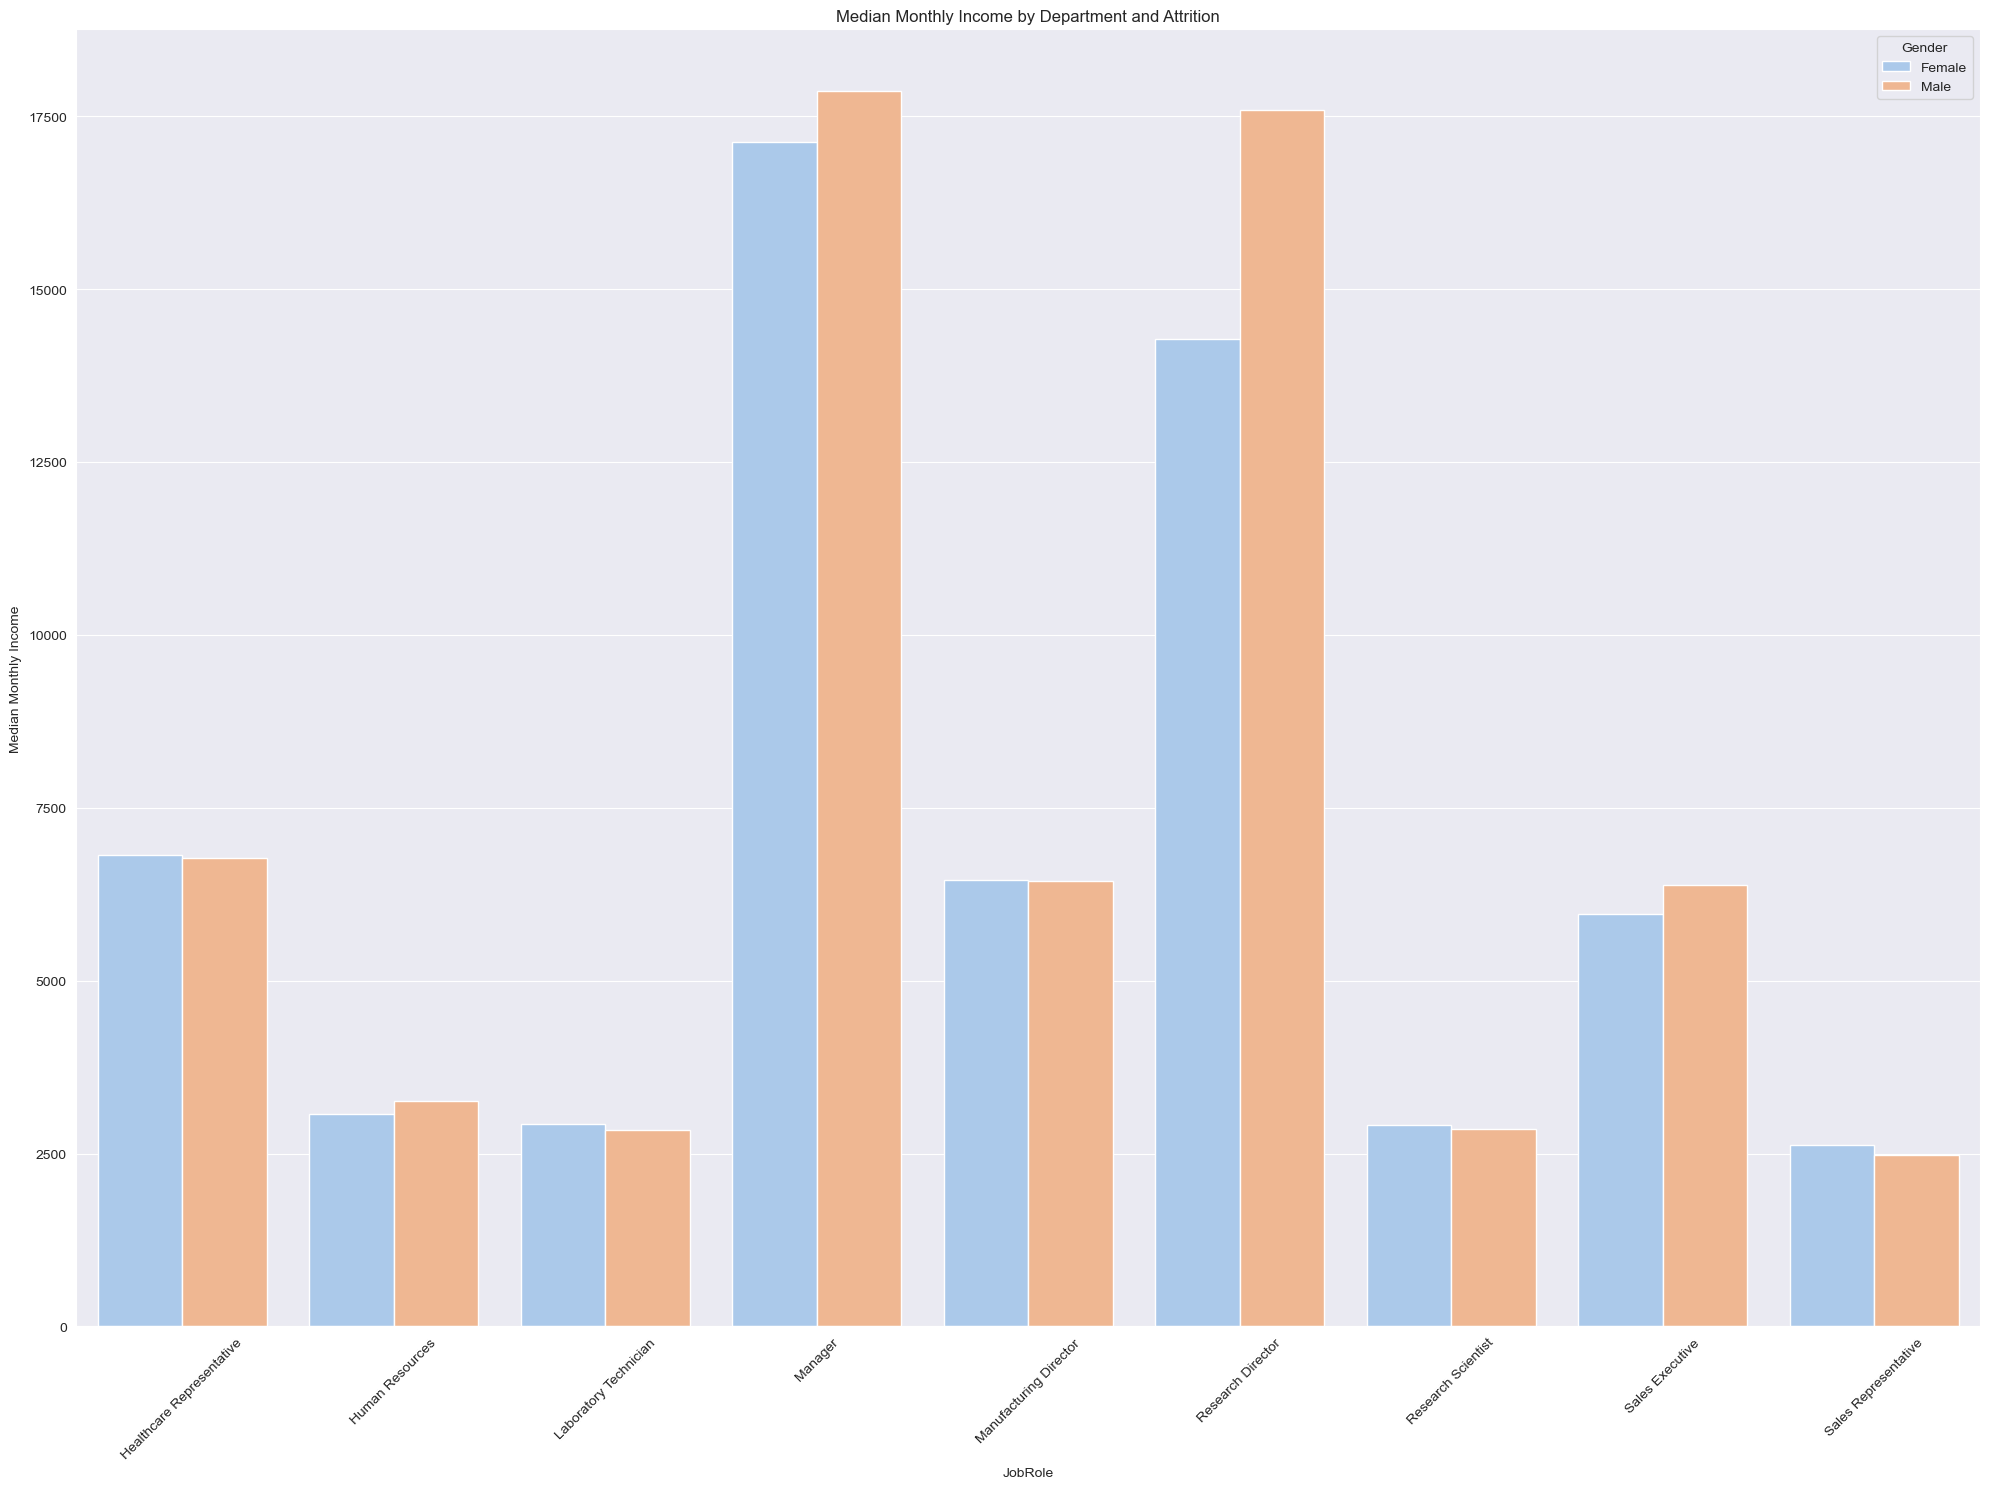

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


total = data['gender'].value_counts()


colors = sns.color_palette('pastel')

# Group the data and calculate the median monthly income
plot_data = data.groupby(['jobrole', 'gender'])['monthlyincome'].median().reset_index()

# Creating the grouped bar plot with custom color palette
plt.figure(figsize=(20, 15))
sns.barplot(data=plot_data, x='jobrole', y='monthlyincome', hue='gender', palette=colors, errorbar=None)

plt.title('Median Monthly Income by Department and Attrition')
plt.xlabel('JobRole')
plt.xticks(rotation=45)
plt.ylabel('Median Monthly Income')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()




# Attrition by Department | Job Role | Monthly Income

In [25]:
# Count the total number of employees in each department
department_counts = data['department'].value_counts()

# Print the total number of employees in each department
print("Total number of employees in each department:")
print(department_counts)


Total number of employees in each department:
department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [26]:
# Filter the DataFrame for employees with attrition
attrited_employees = data[data['attrition'] == 'Yes']

# Count the number of attrited employees per department
attrition_by_department = attrited_employees['department'].value_counts()

# Print the number of attrited employees per department
print("Number of attrited employees per department:")
print(attrition_by_department)


Number of attrited employees per department:
department
Research & Development    133
Sales                      92
Human Resources            12
Name: count, dtype: int64


* Total number of employees in each department:   

* Research & Development    961  (attrited 133) 
* Sales                     446   (attrited 92) 
* Human Resources            63   (attrited 12)



* In higher roles such as Manager, Research Director or sales Excecutive a gender pay gap can be recognized.

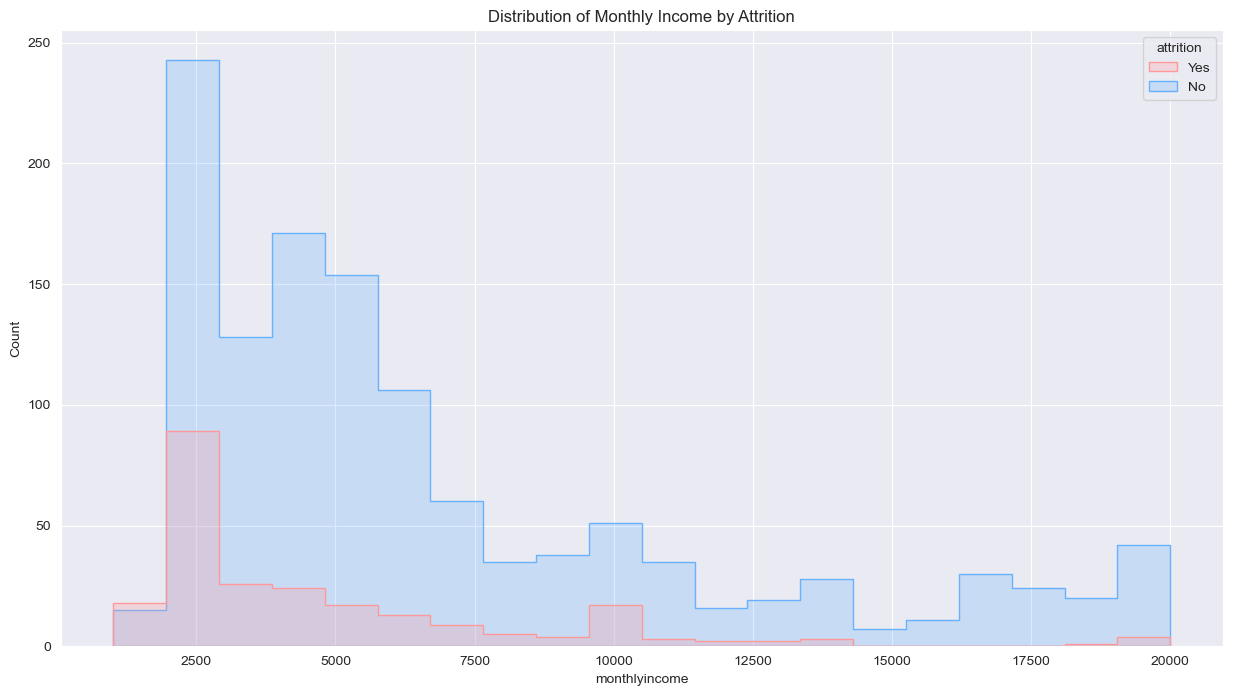

In [27]:
# Checking distribution monthly income by Attrition

plt.figure(figsize=(15, 8))
sns.histplot(data, x="monthlyincome", hue="attrition", element="step", palette={"Yes": "#FF9999", "No": "#66B2FF"})
plt.title('Distribution of Monthly Income by Attrition')
plt.show()



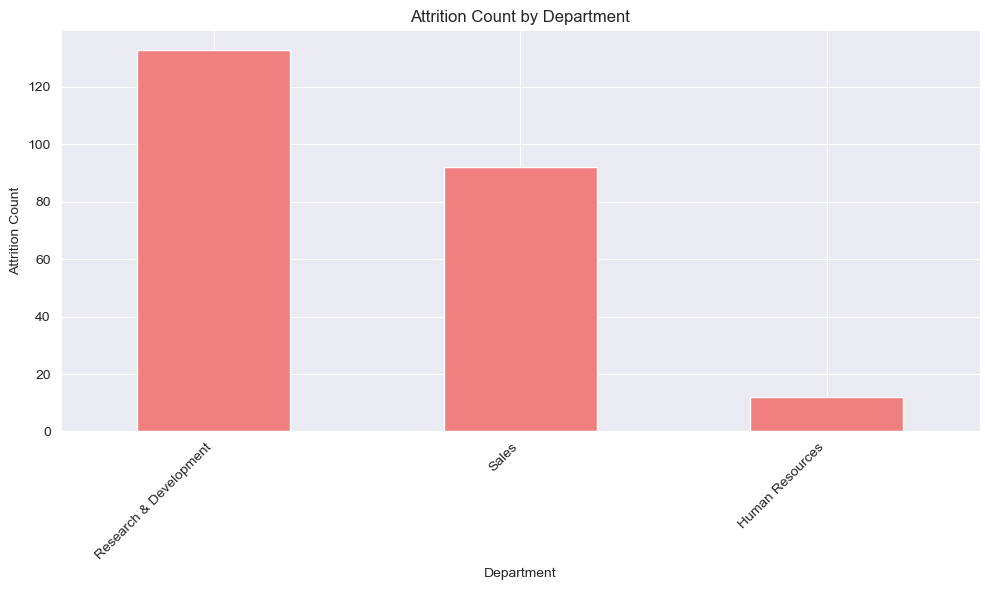

In [28]:
import matplotlib.pyplot as plt

# Filter the data to include only employees with attrition
attrition_data = data[data['attrition'] == 'Yes']

# Group the filtered data by department and count the number of entries
attrition_by_department = attrition_data.groupby('department').size()

# Sort the departments based on attrition count in descending order
attrition_by_department_sorted = attrition_by_department.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
attrition_by_department_sorted.plot(kind='bar', color='lightcoral')
plt.xlabel('Department')
plt.ylabel('Attrition Count')
plt.title('Attrition Count by Department')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()





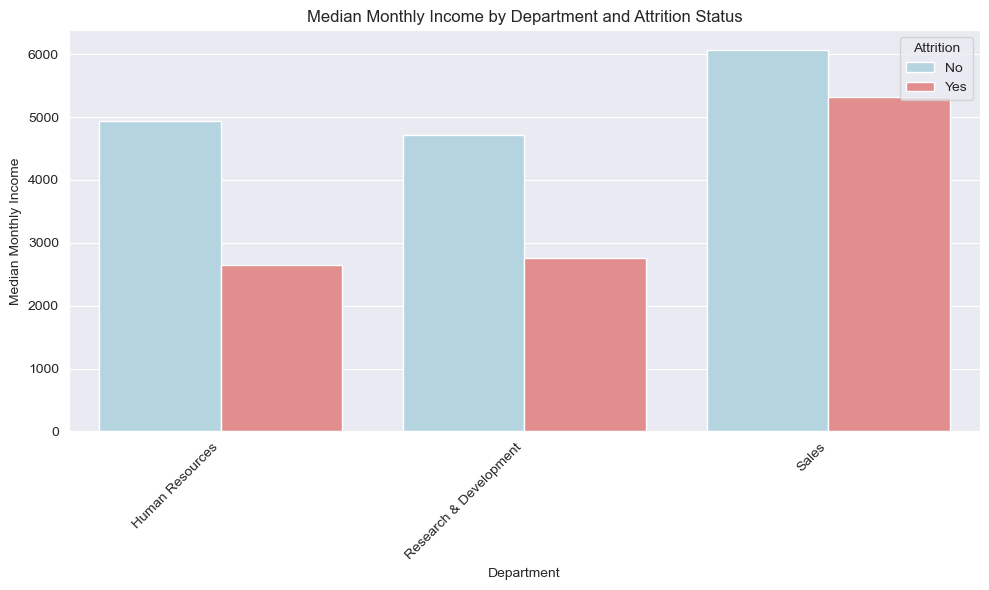

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specified departments
selected_departments = ['Human Resources', 'Research & Development', 'Sales']
filtered_data = data[data['department'].isin(selected_departments)]

# Group the filtered data by department and attrition status, then calculate the median monthly income
median_monthly_income = filtered_data.groupby(['department', 'attrition'])['monthlyincome'].median().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=median_monthly_income, x='department', y='monthlyincome', hue='attrition', palette={'Yes': 'lightcoral', 'No': 'lightblue'})
plt.title('Median Monthly Income by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Median Monthly Income')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()


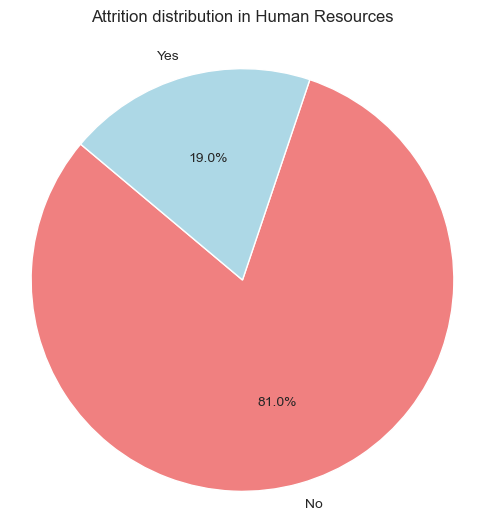

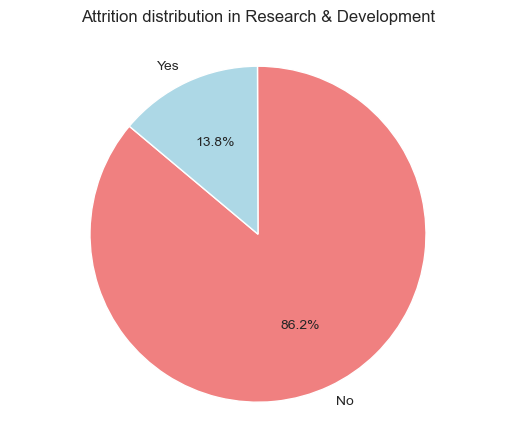

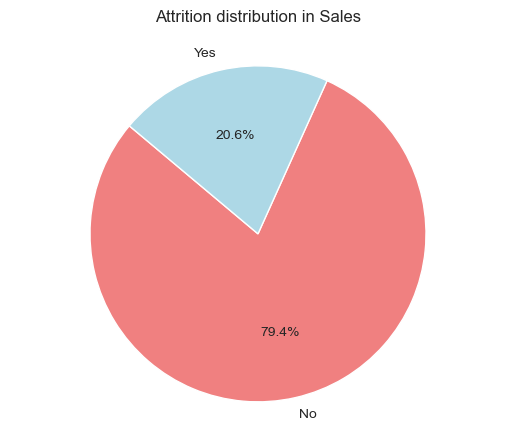

In [30]:
import matplotlib.pyplot as plt

# Group the filtered data by department and attrition status, then calculate the count of employees
attrition_count = filtered_data.groupby(['department', 'attrition']).size().unstack()

# Plotting
plt.figure(figsize=(6, 6))
colors = ['lightcoral', 'lightblue']

for department in selected_departments:
    plt.pie(attrition_count.loc[department], labels=attrition_count.columns, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Attrition distribution in {department}', pad=20)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


# Distribution Job Satisfaction by Attrition

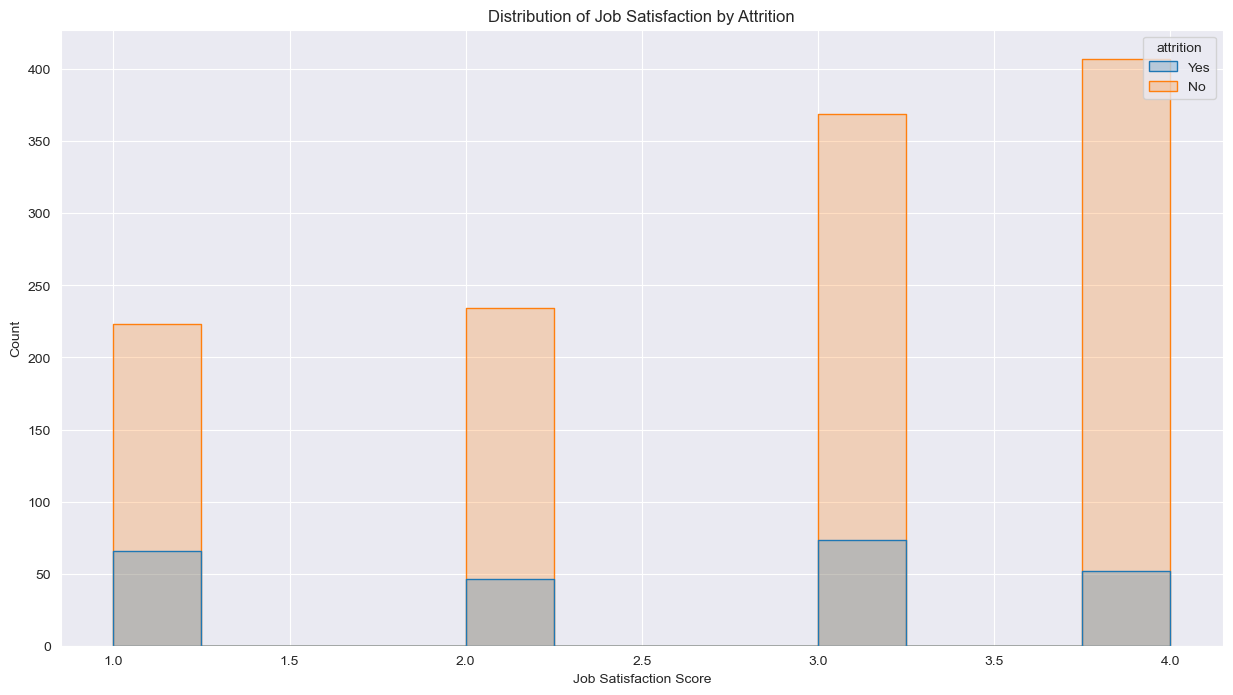

In [31]:
plt.figure(figsize=(15,8))
sns.histplot(data=data, x="jobsatisfaction", hue="attrition", element="step")
plt.title('Distribution of Job Satisfaction by Attrition')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.show()


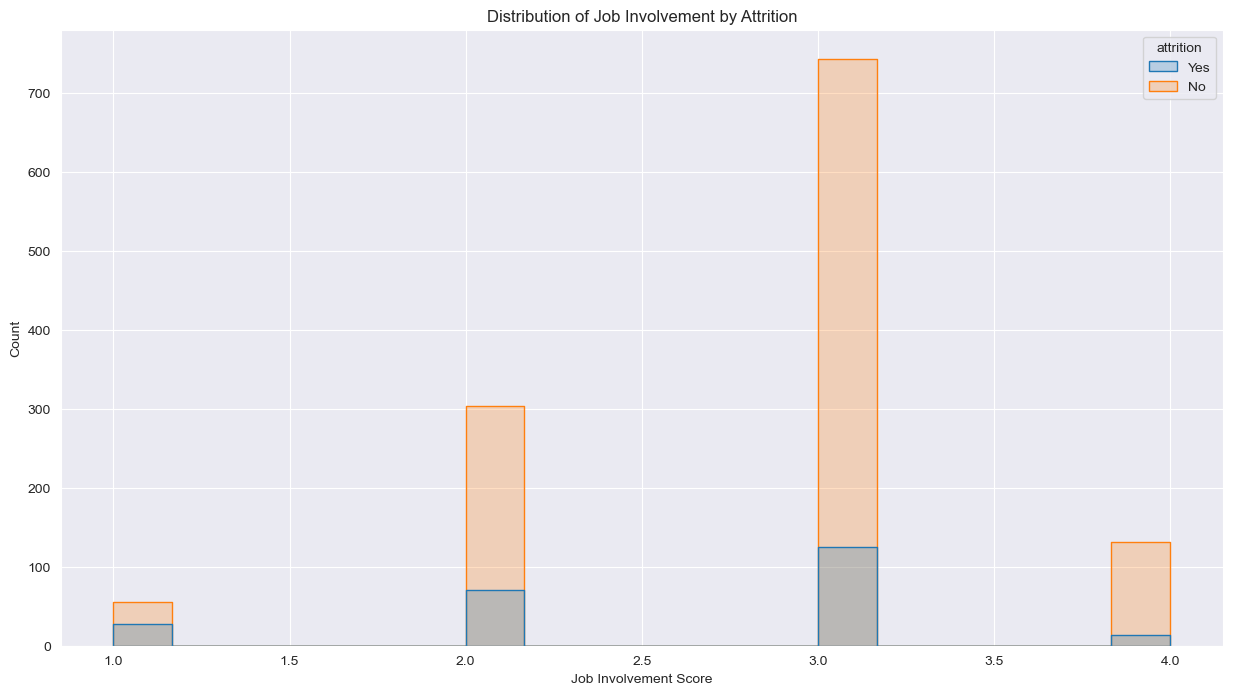

In [32]:
plt.figure(figsize=(15,8))
sns.histplot(data=data, x="jobinvolvement", hue="attrition", element="step")
plt.title('Distribution of Job Involvement by Attrition')
plt.xlabel('Job Involvement Score')
plt.ylabel('Count')
plt.show()


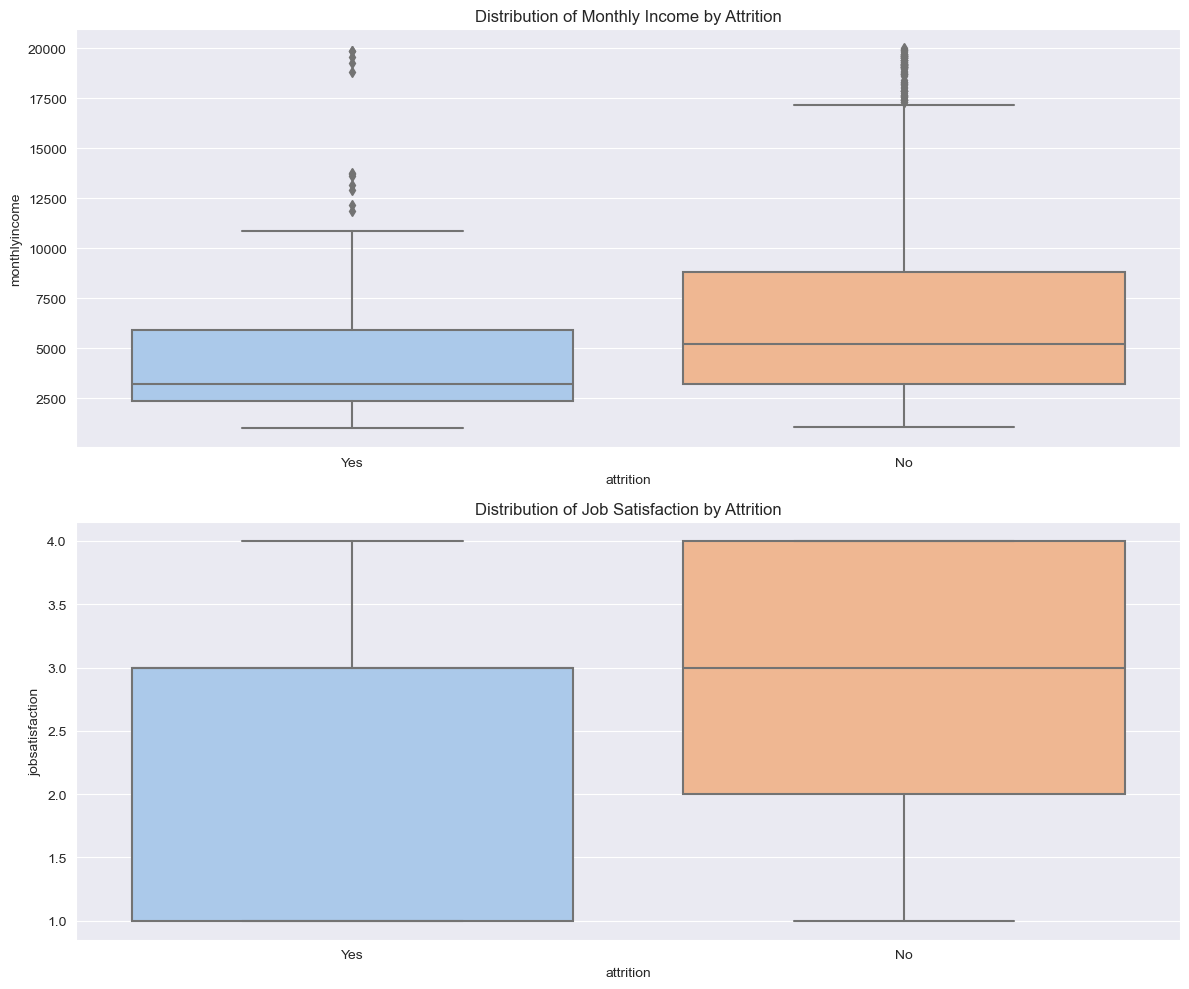

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot Monthly Income distribution by Attrition
sns.boxplot(data=data, x='attrition', y='monthlyincome', ax=axes[0], palette='pastel')
axes[0].set_title('Distribution of Monthly Income by Attrition')

# Plot Job Satisfaction distribution by Attrition
sns.boxplot(data=data, x='attrition', y='jobsatisfaction', ax=axes[1], palette='pastel')
axes[1].set_title('Distribution of Job Satisfaction by Attrition')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd

attrition_by_job_role = data.groupby('jobrole')['attrition'].value_counts(normalize=True).unstack()

print(attrition_by_job_role)


attrition                        No       Yes
jobrole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590


In [35]:
import pandas as pd


attrition_total = data[data['attrition'] == 'Yes'].groupby('jobrole').size()

attrition_percentage = (attrition_total / attrition_total.sum()) * 100

print(attrition_percentage)


jobrole
Healthcare Representative     3.797468
Human Resources               5.063291
Laboratory Technician        26.160338
Manager                       2.109705
Manufacturing Director        4.219409
Research Director             0.843882
Research Scientist           19.831224
Sales Executive              24.050633
Sales Representative         13.924051
dtype: float64


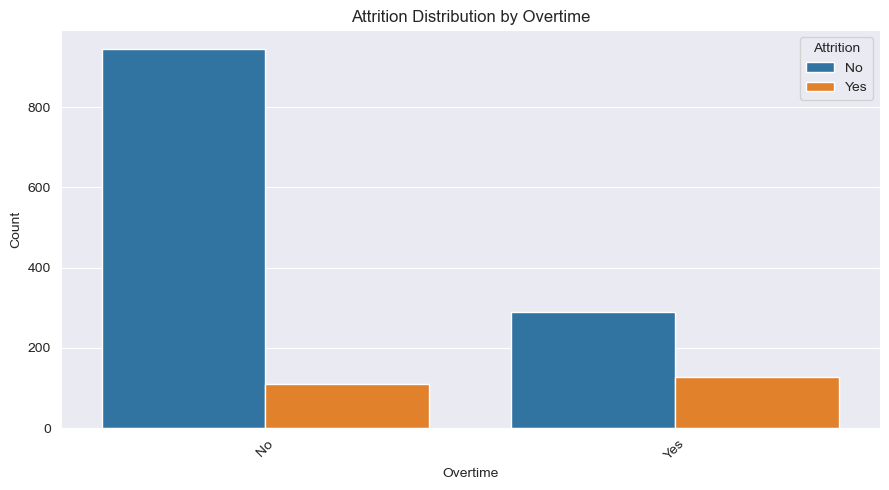

In [36]:

# Group the data and calculate the counts of Attrition by OverTime
plot_data = data.groupby(['overtime', 'attrition']).size().reset_index(name='Count')

# Create the grouped bar plot
plt.figure(figsize=(9, 5))
sns.barplot(data=plot_data, x='overtime', y='Count', hue='attrition')

# Add labels and title
plt.title('Attrition Distribution by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show plot
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


# Dividing features into Numerical and Categorical for a better analysis

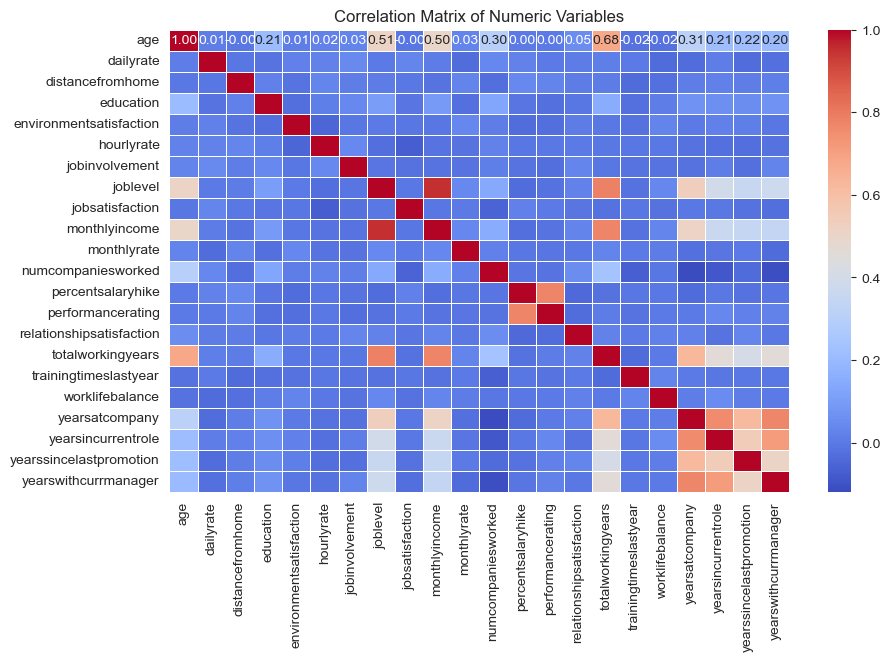

In [37]:
# Selecting only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include='number')

corr = numeric_data.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')

plt.show()




#  Correlation results (sample analysis)

* Monthly income is highly correlated with Job level
* Job level is highly correlated with total working hours.
* Monthly income is highly correlated with the job level and the total working years.
* Age is also positively correlated with the Total working years.
* Marital status and stock option level are negatively correlated

In [38]:
numeric_data = ['age', 'dailyrate', 'distancefromhome', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
                 'percentsalaryhike', 'standardhours', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 
                 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
categorical_data = ['attrition', 'businesstravel','department', 'education', 'educationfield', 'employeecount','employeenumber',
                    'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
                    'maritalstatus', 'over18', 'overtime', 'performancerating', 'relationshipsatisfaction', 'stockoptionLevel',
                    'worklifebalance']

df1 = data.copy(deep = True)

* According to the dataset information, we divide the features into categorical and discrete features.
Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.
Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

*Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
Modifications in the original dataset will not be highlighted in this deep copy.

*We now LabelEncode the categorical features with text data.

# Preprocessing the data 

* Checking the categories in each variable. So we can identify the ones we will use for encoding in order to about the alter the results of the models scores.

In [39]:
# let's review the data type, we need to consider those categorical features that are ordinal or nominal. 

categorical_data

['attrition',
 'businesstravel',
 'department',
 'education',
 'educationfield',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'gender',
 'jobinvolvement',
 'joblevel',
 'jobrole',
 'jobsatisfaction',
 'maritalstatus',
 'over18',
 'overtime',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionLevel',
 'worklifebalance']

In [40]:
data['attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
# Looking for unique values on categorical columns
categorical_columns = ['attrition', 'businesstravel', 'department', 'education', 'educationfield',
                       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel', 'jobrole',
                       'jobsatisfaction', 'maritalstatus', 'overtime', 'performancerating',
                       'relationshipsatisfaction', 'worklifebalance']


for column in categorical_columns:
    unique_categories = data[column].unique()
    print(f"Column: {column}, Unique Categories: {unique_categories}")


Column: attrition, Unique Categories: ['Yes' 'No']
Column: businesstravel, Unique Categories: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Column: department, Unique Categories: ['Sales' 'Research & Development' 'Human Resources']
Column: education, Unique Categories: [2 1 4 3 5]
Column: educationfield, Unique Categories: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Column: environmentsatisfaction, Unique Categories: [2 3 4 1]
Column: gender, Unique Categories: ['Female' 'Male']
Column: jobinvolvement, Unique Categories: [3 2 4 1]
Column: joblevel, Unique Categories: [2 1 3 4 5]
Column: jobrole, Unique Categories: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Column: jobsatisfaction, Unique Categories: [4 2 3 1]
Column: maritalstatus, Unique Categories: ['Single' 'Married' 'Divorced']
Column: over

In [42]:
# We see "Attrition" and "Overtime" is binary, so no need to encode. 

In [43]:
numeric_data  #Don't require Label Encoder or Onehot

['age',
 'dailyrate',
 'distancefromhome',
 'hourlyrate',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'standardhours',
 'totalworkingyears',
 'trainingtimeslastyear',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

LabelEncoder
* Use Label Encoding when your categorical variables have ordinal relationships, meaning there is a clear order or hierarchy among the categories.

One-Hot Encoding:

* Use One-Hot Encoding when your categorical variables are nominal, meaning there is no inherent order or hierarchy among the categories.
* One-Hot Encoding creates binary columns for each category, where each column represents one category and contains a binary value (0 or 1) indicating the presence or absence of that category.

# Ecoding categorical variables & Data Splitting

# Splitting training and testing set

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop('attrition', axis=1)
y = data['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num  = X_test.select_dtypes(np.number)


In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

# Save the scaler 

X_train_num_trans = scaler.transform(X_train_num)
X_test_num_trans  = scaler.transform(X_test_num)

X_train_num_trans_df = pd.DataFrame(X_train_num_trans, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_trans_df  = pd.DataFrame(X_test_num_trans,  columns=X_test_num.columns,  index=X_test_num.index)

scaler2 = MinMaxScaler()
scaler2.fit(X_train_num_trans_df)
# Save the scaler with pickle

X_train_num = scaler2.transform(X_train_num_trans_df)
X_test_num  = scaler2.transform(X_test_num_trans_df)

X_train_num_trans_df = pd.DataFrame(X_train_num, columns=X_train_num_trans_df.columns, index=X_train_num_trans_df.index)
X_test_num_trans_df  = pd.DataFrame(X_test_num,  columns=X_test_num_trans_df.columns,  index=X_test_num_trans_df.index)


In [59]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['businesstravel', 'department', 'educationfield','gender', 'joblevel', 'jobrole',
                       'maritalstatus', 'overtime']

X_train_cat = X_train.select_dtypes('object')
X_test_cat  = X_test.select_dtypes('object')

# Identify binary columns
#bin_cols = ['gender', 'overtime']

# Removing binary columns from categorical columns list
#categorical_columns = [col for col in categorical_columns if col not in bin_cols]

levels=[ list(X_train_cat[col].unique()) for col in X_train_cat]
encoder = OneHotEncoder(drop="first", categories=levels)
encoder.fit(X_train_cat)
# Save the encoder with pickle.


X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded,  columns=encoder.get_feature_names_out(), index=X_test.index)

# Performing one-hot encoding for categorical columns
#data_processed = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Encoding binary columns using Label Encoding
#label_encoder = LabelEncoder()
#for col in bin_cols:
#    data_processed[col] = label_encoder.fit_transform(data_processed[col])

# Split the data into features (X) and target (y)
#X = data_processed.drop('attrition', axis=1)
#y = data_processed['attrition']

# Further we will continue with feature selection/engineering 



In [60]:
X_train = pd.concat([X_train_num_trans_df, X_train_cat_encoded_df], axis=1)
X_test  = pd.concat([X_test_num_trans_df, X_test_cat_encoded_df], axis=1)

X_train.head()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Non-Travel,businesstravel_Travel_Frequently,department_Sales,department_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Human Resources,educationfield_Other,gender_Female,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Manufacturing Director,jobrole_Human Resources,jobrole_Healthcare Representative,jobrole_Sales Representative,jobrole_Manager,jobrole_Research Director,maritalstatus_Single,maritalstatus_Married,overtime_Yes
1097,0.142857,0.177905,0.714286,0.25,0.666667,0.385714,0.333333,0.00,0.000000,0.067773,0.318892,0.000000,0.214286,0.0,0.333333,0.050,0.500000,0.666667,0.025,0.055556,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,0.000000,0.132712,0.142857,0.25,0.333333,0.614286,0.666667,0.00,1.000000,0.002212,0.457699,0.111111,0.285714,0.0,1.000000,0.000,0.333333,0.666667,0.000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
254,0.261905,0.821377,0.678571,0.25,1.000000,0.214286,0.666667,0.25,1.000000,0.311848,0.346838,0.222222,0.214286,0.0,1.000000,0.250,0.333333,0.666667,0.075,0.111111,0.000000,0.117647,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1175,0.500000,0.279770,0.392857,0.50,1.000000,0.514286,0.666667,0.25,0.333333,0.225698,0.224814,0.444444,0.714286,1.0,0.666667,0.175,0.500000,0.666667,0.125,0.222222,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1341,0.309524,0.149928,0.678571,0.50,0.333333,0.842857,0.666667,0.25,0.666667,0.167878,0.663722,0.111111,0.000000,0.0,0.000000,0.250,0.333333,0.666667,0.250,0.444444,0.000000,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Categorical Columns Handling: You identified categorical columns and separated them from binary columns.

* One-Hot Encoding: For non-binary categorical columns, you performed one-hot encoding to convert them into numerical format suitable for machine learning models.

* Label Encoding: For binary columns like 'Gender' and 'OverTime', you used label encoding to convert them into numerical format.

* Data Splitting: You split the data into features (X) and the target variable (y), which is 'Attrition'.

In the transformed dataset, Boolean variables such as OverTime and Gender have been appropriately encoded as False/True values. This encoding is commonly used in machine learning models where boolean values are represented as 0 (False) or 1 (True).

For instance, if OverTime was originally represented as "Yes" and "No", after the encoding, "Yes" would be represented as True (1) and "No" as False (0). Similarly, for Gender, one category (e.g., "Male") could be represented as True (1), while the other category (e.g., "Female") as False (0).

This encoding facilitates the inclusion of binary features in machine learning algorithms, allowing them to understand and learn from the data effectively. Therefore, having False or True values in these variables is an appropriate and common approach in data preprocessing for predictive modeling.

# Feature selection (SelectKbest)


* SelectKBest is not a machine learning model itself, but rather a feature selection technique used in machine learning pipelines to select the most important features from a dataset. It is a part of the feature selection process and helps in reducing the dimensionality of the dataset by selecting a subset of features that are most relevant to the target variable.

* SelectKBest works by scoring each feature using a statistical test (e.g., chi-squared test, ANOVA F-value, mutual information) and selecting the top k features with the highest scores. The choice of k depends on the analyst's or modeler's preference and can be determined based on domain knowledge, experimentation, or using techniques like cross-validation.

* After selecting the features, they can be used as input to machine learning models for training and prediction. Therefore, while SelectKBest is not a machine learning model itself, it is an important preprocessing step in building effective machine learning models.

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Defining the number of features to select (k)
k = 12

# Initializing SelectKBest with the chi-squared (chi2) scoring function
selector = SelectKBest(score_func=chi2, k=k)

# Fiting the selector to the features and target
X_train_selected = selector.fit_transform(X_train, y_train)

#print(X_train_selected)
# Getting the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Getting the names of the selected features
selected_features = X_train.iloc[selected_indices]

print("Selected Features:")
display(selected_features)




Selected Features:


,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Non-Travel,businesstravel_Travel_Frequently,department_Sales,department_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Human Resources,educationfield_Other,gender_Female,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Manufacturing Director,jobrole_Human Resources,jobrole_Healthcare Representative,jobrole_Sales Representative,jobrole_Manager,jobrole_Research Director,maritalstatus_Single,maritalstatus_Married,overtime_Yes
759,0.642857,0.492109,0.821429,0.75,0.333333,0.085714,0.666667,0.00,0.333333,0.061506,0.249910,0.111111,0.357143,0.0,0.000000,0.150,0.500000,0.666667,0.150,0.166667,0.000000,0.235294,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1394,0.333333,0.911765,0.142857,0.75,1.000000,0.371429,0.333333,0.25,1.000000,0.456556,0.322987,0.888889,0.928571,1.0,0.333333,0.200,0.166667,0.666667,0.025,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
818,0.309524,0.495696,0.678571,0.50,0.666667,0.528571,1.000000,0.00,1.000000,0.093839,0.798514,0.000000,0.071429,0.0,0.000000,0.075,0.666667,0.666667,0.050,0.111111,0.133333,0.117647,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
793,0.238095,0.568867,0.500000,0.25,0.000000,0.285714,0.666667,0.00,0.666667,0.063086,0.818631,0.111111,0.357143,0.0,1.000000,0.100,0.833333,0.333333,0.100,0.111111,0.133333,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1352,0.619048,0.048780,0.000000,0.75,0.333333,0.685714,1.000000,0.25,0.000000,0.211901,0.291909,0.222222,0.285714,0.0,1.000000,0.250,0.833333,0.666667,0.050,0.000000,0.133333,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1027,0.380952,0.214491,0.000000,0.50,1.000000,0.800000,0.333333,0.00,0.333333,0.120326,0.064806,0.555556,0.428571,0.0,0.000000,0.175,0.333333,0.333333,0.125,0.222222,0.000000,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
631,0.619048,0.634146,0.250000,0.75,0.000000,0.457143,1.000000,0.00,1.000000,0.095261,0.118450,0.222222,0.928571,1.0,0.666667,0.250,0.333333,0.333333,0.075,0.111111,0.000000,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
894,0.857143,0.418221,0.071429,0.50,1.000000,0.785714,0.666667,0.75,1.000000,0.883096,0.858462,0.333333,0.214286,0.0,0.000000,0.900,0.333333,0.666667,0.250,0.500000,0.000000,0.529412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
898,0.595238,0.586801,0.071429,0.50,0.666667,0.942857,0.000000,1.00,1.000000,0.986361,0.663762,0.333333,0.214286,0.0,0.333333,0.625,0.333333,0.666667,0.200,0.388889,0.000000,0.411765,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
188,0.380952,0.693687,0.035714,0.00,1.000000,0.214286,0.333333,0.25,0.666667,0.449605,0.481028,0.111111,0.428571,0.0,0.666667,0.250,0.333333,0.333333,0.250,0.500000,0.066667,0.529412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# ML PREDICTION MODELS 


# 1. Logistic Regression with Standard Scaler

In [66]:
#to avoid appearing text with warning exceptions
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [72]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

k_folds = 5

cv_scores = cross_val_score(model, X_train, y_train, cv=k_folds)

print("Cross-Validation Scores:", cv_scores)

mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Mean Cross-Validation R2 Score {mean_cv_score: .2f}:")
print(f"Standard Deviation of Cross-Validation R2 Scores {std_cv_score: .2f}:")
print()
print(f"Mean Cross-Validation R2 Score {mean_cv_score: .2f} +/- {2*std_cv_score: .2f}:")

Cross-Validation Scores: [0.86016949 0.89787234 0.86808511 0.86382979 0.85957447]
Mean Cross-Validation R2 Score  0.87:
Standard Deviation of Cross-Validation R2 Scores  0.01:

Mean Cross-Validation R2 Score  0.87 +/-  0.03:


* The Mean Cross-Validation score is 0.8401, indicating that, on average, your model achieves an accuracy of around 84.01%.
* The Standard Deviation of Cross-Validation Scores is relatively low at 0.0037, indicating that the model's performance is relatively stable.

* Overall, your cross-validation results indicate that your model is performing consistently across different subsets of the data

In [75]:
#With StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, cohen_kappa_score
 
logistic_model.fit(X_train, y_train)
# Save the model with pickle.
    
# Making predictions on the test set
y_pred_train_logistic = logistic_model.predict(X_train)
y_pred_test_logistic  = logistic_model.predict(X_test)


kappa_test_score = cohen_kappa_score(y_test, y_pred_test_logistic)
print("Cohen's Kappa Score on Test Set:", kappa_test_score)


print("\nLogistic Regression - Test Set Evaluation:")
print(classification_report(y_test, y_pred_test_logistic))


Cohen's Kappa Score on Test Set: 0.42265298365640436

Logistic Regression - Test Set Evaluation:
              precision    recall  f1-score   support

          No       0.91      0.98      0.94       255
         Yes       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, cohen_kappa_score
import shap

# Step 2: Calculate SHAP values
explainer = shap.LinearExplainer(logistic_model, X_train)
shap_values = explainer.shap_values(X_test)

# Cross-validation scores
cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=5)  
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())

# Making predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate Cohen's Kappa Score on the test set
kappa_score = cohen_kappa_score(y_test, logistic_predictions)
print("Cohen's Kappa Score on Test Set:", kappa_score)

# Print classification report
print("\nLogistic Regression - Test Set Evaluation:")
print(classification_report(y_test, logistic_predictions))


!! Cohen's Kappa Score on Test Set: 0.449620085893624 

The model without GridSearchCV has slightly higher precision and recall for the "Yes" class compared to the model with GridSearchCV.
While both models exhibit similar performance in terms of precision and recall for the "No" class, the model without GridSearchCV performs marginally better for the "Yes" class.
Therefore, considering precision and recall, the Logistic Regression model without GridSearchCV may be preferred for predicting attrition as it achieves slightly better performance in identifying attrition cases.

The Logistic Regression model without GridSearchCV has slightly higher precision, recall, and F1-score for the "Yes" class compared to the Logistic Regression model with GridSearchCV.
The model without GridSearchCV also has a higher Cohen's Kappa Score, indicating better agreement between predicted and observed outcomes.
Therefore, based on the provided evaluation metrics, the Logistic Regression model without GridSearchCV appears to perform better for the attrition prediction task.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this context, it represents the accuracy of the model in predicting "Yes" (attrition) cases.
Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. In this context, it represents the ability of the model to find all the positive samples (attrition cases).
F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
Support: The number of actual occurrences of the class in the specified dataset.
In your case:

* For the "No" class (employees who didn't experience attrition), the model shows high precision (92%), recall (95%), and F1-score (93%). This indicates that the model performs well in predicting non-attrition cases.

* For the "Yes" class (employees who experienced attrition), the model shows lower precision (58%), recall (46%), and F1-score (51%). This suggests that the model's performance in predicting attrition cases is not as strong as for non-attrition cases.

The overall accuracy of the model is 88%.

* Based on this classification report, you can see how well the logistic regression model performs in predicting attrition. The precision, recall, and F1-score metrics provide insights into the model's strengths and weaknesses in classifying both attrition and non-attrition cases.

In [76]:
from sklearn.metrics import confusion_matrix

conf_matrix_lr = confusion_matrix(y_test, y_pred_test_logistic)

print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)


Confusion Matrix for Logistic Regression:
[[249   6]
 [ 25  14]]


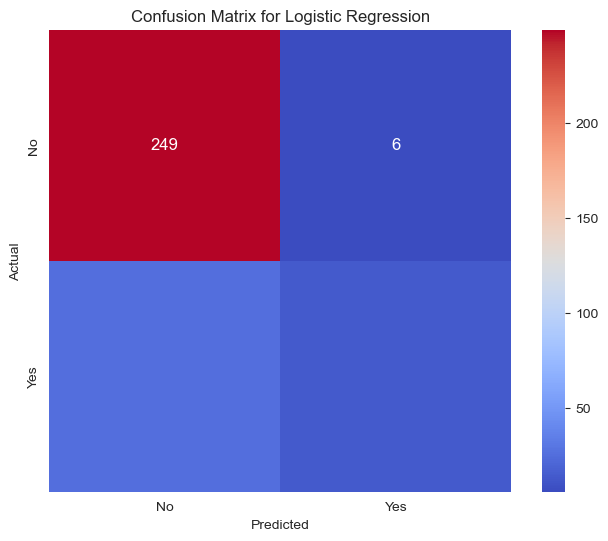

In [77]:
plt.figure(figsize=(8, 6))  
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], annot_kws={"size": 12}, square=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()






# 1.1 Logistic Regression with GridSearchCV

Applying GridSearchCV (as a cross validation with parameter cv 5) to your logistic regression model is a good idea to fine-tune its hyperparameters and potentially improve its performance. Here's how you can incorporate GridSearchCV into your logistic regression model:

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Defining the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  
}


grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred_test_logistic = best_estimator.predict(X_test)


print("Logistic Regression with GridSearchCV:")
print(classification_report(y_test, y_pred_test_logistic))


Logistic Regression with GridSearchCV:
              precision    recall  f1-score   support

          No       0.91      0.98      0.94       255
         Yes       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



In [80]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(y_test, y_pred_test_logistic)
print(f"Cohen's Kappa Score {kappa_score: .2f}:")


Cohen's Kappa Score  0.42:


! It seems that the logistic regression model with GridSearchCV has provided similar performance to the previous logistic regression model. However LogisticRegression with Standard Scaler has higher Kappa's score 44% and gives overall more score in the the Test Set Evalaation. 

# 1.2 Logistic Regression Model

In [ ]:
kappa_score_logistic_predictions = cohen_kappa_score(y_test, logistic_predictions)
print("Cohen's Kappa Score on Test Set - Logistic Prediction:", kappa_score_logistic_predictions)

# 1.3. Logistic Regression Model - Oversampling 


In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

logistic_model.fit(X_oversampled, y_oversampled)


logistic_predictions_oversampled = logistic_model.predict(X_test)

print("Logistic Regression - Oversampling:")
print(classification_report(y_test, logistic_predictions_oversampled))

cv_scores_oversampled = cross_val_score(logistic_model, X_oversampled, y_oversampled, cv=5)


print("Cross-Validation Scores - Oversampling:", cv_scores_oversampled)
print("Mean Cross-Validation Score - Oversampling:", cv_scores_oversampled.mean())
print("Standard Deviation of Cross-Validation Scores - Oversampling:", cv_scores_oversampled.std())


Logistic Regression - Oversampling:
              precision    recall  f1-score   support

          No       0.92      0.80      0.85       255
         Yes       0.30      0.56      0.39        39

    accuracy                           0.77       294
   macro avg       0.61      0.68      0.62       294
weighted avg       0.84      0.77      0.79       294

Cross-Validation Scores - Oversampling: [0.78571429 0.85933504 0.83375959 0.78772379 0.81585678]
Mean Cross-Validation Score - Oversampling: 0.8164778955060286
Standard Deviation of Cross-Validation Scores - Oversampling: 0.02796060093166953


In [ ]:
kappa_score_oversampled = cohen_kappa_score(y_test, logistic_predictions_oversampled)
print("Cohen's Kappa Score on Test Set - Oversampling:", kappa_score_oversampled)

# 1.4. Logistic Regression Model - Unsampling

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Filtering out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [ ]:
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)


logistic_model = LogisticRegression()


cv_scores_undersampled = cross_val_score(logistic_model, X_undersampled, y_undersampled, cv=5)


logistic_model.fit(X_undersampled, y_undersampled)


logistic_predictions_undersampled = logistic_model.predict(X_test)


print("Cross-Validation Scores - Undersampling:")
print(cv_scores_undersampled)
print("Mean Cross-Validation Score:", cv_scores_undersampled.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores_undersampled.std())


print("Logistic Regression - Undersampling:")
print(classification_report(y_test, logistic_predictions_undersampled))


In [ ]:
kappa_score_undersampled = cohen_kappa_score(y_test, logistic_predictions_undersampled)
print("Cohen's Kappa Score on Test Set - Undersampling:", kappa_score_undersampled)

 # Logistic Regression - Normal Prediction:
 
            precision    recall  f1-score   support

         No       0.87      1.00      0.93       255
        Yes       1.00      0.03      0.05       39

    accuracy                          0.87       294
    macro avg     0.94      0.51      0.49       294
    weighted avg  0.89      0.87      0.81       294



# Logistic Regression - Oversampling:

              precision    recall  f1-score   support

          No       0.90      0.66      0.76       255
         Yes       0.19      0.51      0.28        39

    accuracy                           0.64       294
    macro avg      0.54      0.59      0.52       294
    weighted avg   0.80      0.64      0.70       294
    
    
# Logistic Regression - Undersampling:


              precision    recall  f1-score   support

          No       0.93      0.72      0.81       255
         Yes       0.26      0.64      0.37        39

    accuracy                           0.71       294
    macro avg      0.59      0.68      0.59       294
    weighted avg   0.84      0.71      0.75       294



* Based on the Cohen's Kappa scores we tested for logistic regression models with different techniques:

- Undersampling: Cohen's Kappa Score = 0.220
- Oversampling: Cohen's Kappa Score = 0.102
- Logistic Prediction: Cohen's Kappa Score = 0.044
- Logistic Regression with GridSearchCV: Cohen's Kappa Score = 0.388

* We can see that the logistic regression model with GridSearchCV has the highest Cohen's Kappa score (0.388). 
This indicates that the logistic regression model trained with GridSearchCV performs better in terms of precision for predicting employee attrition compared to the other logistic regression models with undersampling, oversampling, and without any resampling techniques. 

* Reasonable Precision, Recall, and F1-scores: While the precision, recall, and F1-scores may not be exceptionally high, they show a balanced performance for both classes (Yes and No), which is crucial for predicting employee attrition accurately.

Cross-Validation Performance: The mean cross-validation score (0.884) for the Logistic Regression model with GridSearchCV is relatively high, suggesting good generalization performance across different folds of the training data. This indicates that the model is likely to perform well on unseen data.

* The normal prediction scenario yields the highest precision and recall for the "No" class but performs poorly for the "Yes" class. Oversampling and undersampling techniques attempt to address class imbalance but may lead to different trade-offs in precision, recall, and accuracy. It's essential to consider the specific requirements and goals of the classification task when selecting the appropriate sampling technique.




* Based on the precision scores, the mode with the highest precision for predicting attrition is Logistic Regression - Normal Prediction. It has a precision of 1.00 for predicting "Yes" (attrition), indicating that it correctly identifies all positive cases without any false positives. However, it's essential to consider other performance metrics and potential trade-offs between precision and recall, depending on the business's objectives and the costs associated with misclassifications.

# 2. Random Forest Classifier 

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the updated parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [10, 15, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'max_features': ['sqrt']           # Set max_features explicitly to 'sqrt'
}


rf_classifier = RandomForestClassifier()

# Performing Randomized Search Cross Validation
rf_random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                      n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fitting the Randomized Search CV to the training data
rf_random_search.fit(X_train, y_train)

best_params = rf_random_search.best_params_
print("Best Parameters:", best_params)

cv_scores = cross_val_score(rf_random_search.best_estimator_, X_train, y_train, cv=5)

print("Cross-Validation accuracy Scores:", cv_scores)
print("Mean Cross-Validation accuracy Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation accuracy Scores:", cv_scores.std())


y_pred = rf_random_search.predict(X_test)
print(classification_report(y_test, y_pred))

#logistic_model.coef_
random_search.best_estimator.feature_importances_

In [ ]:
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_score)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X = data_processed.drop('attrition', axis=1)
y = data_processed['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Class Distribution Before Resampling:")
print(y_train.value_counts())

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Cross-validations
cv_scores_oversampled = cross_val_score(rf_classifier, X_train_oversampled, y_train_oversampled, cv=5)
cv_scores_undersampled = cross_val_score(rf_classifier, X_train_undersampled, y_train_undersampled, cv=5)

print("\nCross-Validation Scores - Oversampling:")
print(cv_scores_oversampled)
print("Mean Cross-Validation Score - Oversampling:", cv_scores_oversampled.mean())
print("Standard Deviation of Cross-Validation Scores - Oversampling:", cv_scores_oversampled.std())

print("\nCross-Validation Scores - Undersampling:")
print(cv_scores_undersampled)
print("Mean Cross-Validation Score - Undersampling:", cv_scores_undersampled.mean())
print("Standard Deviation of Cross-Validation Scores - Undersampling:", cv_scores_undersampled.std())

# Oversampling
rf_classifier.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = rf_classifier.predict(X_test)
print("\nClassification Report - Oversampling:")
print(classification_report(y_test, y_pred_oversampled))

# Undersampling
rf_classifier.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = rf_classifier.predict(X_test)
print("\nClassification Report - Undersampling:")
print(classification_report(y_test, y_pred_undersampled))


In [ ]:
from sklearn.metrics import cohen_kappa_score

rf_classifier.fit(X_train, y_train)
y_pred_normal = rf_classifier.predict(X_test)

kappa_normal = cohen_kappa_score(y_test, y_pred_normal)

print("Cohen's Kappa Score - Normal Prediction:", kappa_normal)


In [ ]:
from sklearn.metrics import cohen_kappa_score

rf_classifier.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = rf_classifier.predict(X_test)

rf_classifier.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = rf_classifier.predict(X_test)

kappa_oversampling = cohen_kappa_score(y_test, y_pred_oversampled)
kappa_undersampling = cohen_kappa_score(y_test, y_pred_undersampled)

print("Cohen's Kappa Score - Oversampling:", kappa_oversampling)
print("Cohen's Kappa Score - Undersampling:", kappa_undersampling)


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = rf_random_search.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_random_search.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


* The model achieved an overall accuracy of 88% on the test set. However, it seems to struggle with the 'Yes' class, as indicated by the lower precision, recall, and F1-score for that class.

!! Random Forest classifier achieved higher overall accuracy (88% vs. the accuracy of the logistic regression model), but it showed lower precision, recall, and F1-score for the 'Yes' class, indicating potential challenges in predicting positive instances of HR attrition.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)


rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_oversampled, y_train_oversampled)

y_pred = rf_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# Doing the same but with Random Forest Classifier, all in 1 syntax, comparing normal model with oversampling and undersampling  

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report

# Random Forest Classifier - Normal Prediction
rf_normal = RandomForestClassifier(random_state=42)
rf_normal.fit(X_train, y_train)
rf_normal_predictions = rf_normal.predict(X_test)

# Random Forest Classifier - Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf_oversampling = RandomForestClassifier(random_state=42)
rf_oversampling.fit(X_train_smote, y_train_smote)
rf_oversampling_predictions = rf_oversampling.predict(X_test)

# Random Forest Classifier - Undersampling
undersample = NearMiss(version=1, n_neighbors=3)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)
rf_undersampling = RandomForestClassifier(random_state=42)
rf_undersampling.fit(X_train_undersample, y_train_undersample)
rf_undersampling_predictions = rf_undersampling.predict(X_test)

# Cross-validation
cv_scores_normal = cross_val_score(rf_normal, X_train, y_train, cv=5)
cv_scores_oversampling = cross_val_score(rf_oversampling, X_train_smote, y_train_smote, cv=5)
cv_scores_undersampling = cross_val_score(rf_undersampling, X_train_undersample, y_train_undersample, cv=5)

print("Cross-Validation Scores - Normal Prediction:", cv_scores_normal)
print("Mean Cross-Validation Score - Normal Prediction:", cv_scores_normal.mean())
print("Standard Deviation of Cross-Validation Scores - Normal Prediction:", cv_scores_normal.std())

print("Cross-Validation Scores - Oversampling:", cv_scores_oversampling)
print("Mean Cross-Validation Score - Oversampling:", cv_scores_oversampling.mean())
print("Standard Deviation of Cross-Validation Scores - Oversampling:", cv_scores_oversampling.std())

print("Cross-Validation Scores - Undersampling:", cv_scores_undersampling)
print("Mean Cross-Validation Score - Undersampling:", cv_scores_undersampling.mean())
print("Standard Deviation of Cross-Validation Scores - Undersampling:", cv_scores_undersampling.std())


print("Random Forest Classifier - Normal Prediction:")
print(classification_report(y_test, rf_normal_predictions))

print("Random Forest Classifier - Oversampling:")
print(classification_report(y_test, rf_oversampling_predictions))

print("Random Forest Classifier - Undersampling:")
print(classification_report(y_test, rf_undersampling_predictions))


In [ ]:
import shap

# Define a function to calculate SHAP values
def calculate_shap_values(model, X_data):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)
    return shap_values

shap_values_normal = calculate_shap_values(rf_normal, X_test)
shap_values_oversampling = calculate_shap_values(rf_oversampling, X_test)
shap_values_undersampling = calculate_shap_values(rf_undersampling, X_test)


* Considering the goal of predicting employee attrition, the model with oversampling (SMOTE) seems to perform the best among the three. It has the highest mean cross-validation score and the highest Cohen's Kappa score, indicating better precision in predicting employee attrition. While the standard deviation in cross-validation scores is relatively high, indicating some variability, the overall performance of the oversampling model appears to be the most promising for the attrition prediction task.

* Oversampling (SMOTE):

Cross-Validation Score: Mean = 0.893, Standard Deviation = 0.157
Cohen's Kappa Score: 0.240
Performance:
Highest mean cross-validation score but with a high standard deviation.
Improved Cohen's Kappa score compared to the normal prediction.
Slightly lower precision, recall, and F1-score for the minority class (Yes).

* !! HOWEVER comparing from our Logistic Regression performance, it seems that Logistic Regression generally outperforms better than the Random Forest Classifier in terms of precision, recall, and F1-score for predicting employee attrition. Consider both models still have room for improvement, especially in correctly identifying employees who leave (recall) and minimizing misclassifications (precision)


# KNN Prediction Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski distance
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

knn_predictions = best_knn_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

knn_predictions = best_knn_model.predict(X_test)

print("KNN Classifier - Grid Search Results:")
print(classification_report(y_test, knn_predictions))


In [ ]:
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

kappa_score = cohen_kappa_score(y_test, knn_predictions)
print("Cohen's Kappa Score:", kappa_score)

cv_scores = cross_val_score(best_knn_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())


* the KNN Classifier model seems to have limitations in correctly identifying employees who will be attrited, especially evident from the low recall score for the "Yes" class.
* he Kappa score is approximately 0.059, indicating slight agreement between the predicted and actual classes. However, the recall for the "Yes" class (employees who will be attrited) is low at 0.08, suggesting that the model struggles to correctly identify employees who will be attrited.
The overall accuracy of the model is 0.85, meaning it correctly predicts the class label for 85% of the instances.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def knn_resampling(X_train, y_train, resampling='oversampling'):
    if resampling == 'oversampling':
        resampler = RandomOverSampler()
    elif resampling == 'undersampling':
        resampler = RandomUnderSampler()
    else:
        raise ValueError("Invalid resampling strategy. Choose 'oversampling' or 'undersampling'.")

    # Applying resampling to the data
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    # Splitting the resampled data into train and test sets
    X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42
    )

    # Training KNN Model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_resampled, y_train_resampled)
    
    cv_scores = cross_val_score(knn_model, X_resampled, y_resampled, cv=5)

    mean_cv_score = cv_scores.mean()


    knn_predictions = knn_model.predict(X_test_resampled)
    print("KNN Classifier - Resampled Data:")
    print(classification_report(y_test_resampled, knn_predictions))
    
    kappa_score = cohen_kappa_score(y_test_resampled, knn_predictions)
    print("Kappa Score:", kappa_score)


knn_resampling(X_train, y_train, resampling='oversampling')
knn_resampling(X_train, y_train, resampling='undersampling')


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, cohen_kappa_score

# Function to perform KNN classification with resampling
def knn_resampling(X_train, y_train, resampling='oversampling'):
    if resampling == 'oversampling':
        resampler = RandomOverSampler()
    elif resampling == 'undersampling':
        resampler = RandomUnderSampler()
    else:
        raise ValueError("Invalid resampling strategy. Choose 'oversampling' or 'undersampling'.")

    # Applying resampling to the data
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    # Training KNN Model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    
    # Cross-validation
    cv_scores = cross_val_score(knn_model, X_resampled, y_resampled, cv=5)
    mean_cv_score = cv_scores.mean()

    knn_model.fit(X_resampled, y_resampled)


    knn_predictions = knn_model.predict(X_resampled)
    kappa_score = cohen_kappa_score(y_resampled, knn_predictions)

    print(f"KNN Classifier - Resampling: {resampling}")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", mean_cv_score)
    print("Kappa Score:", kappa_score)

    
    print("Classification Report:")
    knn_predictions_test = knn_model.predict(X_test)
    print(classification_report(y_test, knn_predictions_test))

    return knn_model

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the function with oversampling strategy
knn_resampling(X_train, y_train, resampling='oversampling')

# Applying the function with undersampling strategy
knn_resampling(X_train, y_train, resampling='undersampling')



# Our Selected ML Model -- KNN Oversampling

In [84]:
X_train.head()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Non-Travel,businesstravel_Travel_Frequently,department_Sales,department_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Human Resources,educationfield_Other,gender_Female,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Manufacturing Director,jobrole_Human Resources,jobrole_Healthcare Representative,jobrole_Sales Representative,jobrole_Manager,jobrole_Research Director,maritalstatus_Single,maritalstatus_Married,overtime_Yes
1097,0.142857,0.177905,0.714286,0.25,0.666667,0.385714,0.333333,0.00,0.000000,0.067773,0.318892,0.000000,0.214286,0.0,0.333333,0.050,0.500000,0.666667,0.025,0.055556,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,0.000000,0.132712,0.142857,0.25,0.333333,0.614286,0.666667,0.00,1.000000,0.002212,0.457699,0.111111,0.285714,0.0,1.000000,0.000,0.333333,0.666667,0.000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
254,0.261905,0.821377,0.678571,0.25,1.000000,0.214286,0.666667,0.25,1.000000,0.311848,0.346838,0.222222,0.214286,0.0,1.000000,0.250,0.333333,0.666667,0.075,0.111111,0.000000,0.117647,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1175,0.500000,0.279770,0.392857,0.50,1.000000,0.514286,0.666667,0.25,0.333333,0.225698,0.224814,0.444444,0.714286,1.0,0.666667,0.175,0.500000,0.666667,0.125,0.222222,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1341,0.309524,0.149928,0.678571,0.50,0.333333,0.842857,0.666667,0.25,0.666667,0.167878,0.663722,0.111111,0.000000,0.0,0.000000,0.250,0.333333,0.666667,0.250,0.444444,0.000000,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, cohen_kappa_score
import shap

def knn_resampling(X_train, y_train, X_test, y_test, resampling='oversampling'):
    if resampling == 'oversampling':
        resampler = RandomOverSampler()
    elif resampling == 'undersampling':
        resampler = RandomUnderSampler()
    else:
        raise ValueError("Invalid resampling strategy. Choose 'oversampling' or 'undersampling'.")

    
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Training KNN Model
    knn_model = KNeighborsClassifier(n_neighbors=5) 
    knn_model.fit(X_train_resampled, y_train_resampled)
    
    # Cross-validation
    cv_scores = cross_val_score(knn_model, X_train_resampled, y_train_resampled, cv=5)
    mean_cv_score, std_cv_score = cv_scores.mean(), cv_scores.std()
    
    print(f"The expected accuracy of the model is {mean_cv_score:.2f} +/- {2*std_cv_score:.2f}")
    print()

    knn_predictions_train = knn_model.predict(X_train_resampled)
    knn_predictions_test = knn_model.predict(X_test)
    
    print(f"Result after {resampling}")
    print()
    
    print("KNN Classifier - TRAIN Resampled Data:")
    print(classification_report(y_train_resampled, knn_predictions_train))
    
    print("KNN Classifier - TEST Resampled Data:")
    print(classification_report(y_test, knn_predictions_test))

    kappa_score_train = cohen_kappa_score(y_train_resampled, knn_predictions_train)
    print(f"Kappa Score in TRAIN set: {kappa_score_train: .2f}")
    
    kappa_score_test = cohen_kappa_score(y_test, knn_predictions_test)
    print(f"Kappa Score in TEST set: {kappa_score_test: .2f}")
    
    # First column corresponds to employees that remain in the company ('No')
    # Second column corresponds to employees taht leave the company ("Yes")
    #display(knn_model.predict_proba(X_test)[2])
    #display(knn_model.predict(X_test)[2])
    
    
    # Calculating and print SHAP values
    
    def f(x):
        return knn_model.predict_proba(x)[:, 1]


    med = X_train_resampled.median().values.reshape((1, X_train_resampled.shape[1]))

    explainer = shap.Explainer(f, med)

    #display(X_test.iloc[0:100,:])
    #shap_values_norm = explainer(X_test.iloc[0:100, :])
    #explainer = shap.KernelExplainer(knn_model.predict_proba, X_train_resampled)
    #shap_values = explainer.shap_values(X_test_resampled)
    
    #print("SHAP Values Shape:", shap_values.shape)

knn_resampling(X_train, y_train, X_test, y_test, resampling='oversampling')
print("---"*30)
print(" ")
knn_resampling(X_train, y_train, X_test, y_test, resampling='undersampling')


The expected accuracy of the model is 0.82 +/- 0.02

Result after oversampling

KNN Classifier - TRAIN Resampled Data:
              precision    recall  f1-score   support

          No       0.99      0.83      0.90       978
         Yes       0.85      0.99      0.92       978

    accuracy                           0.91      1956
   macro avg       0.92      0.91      0.91      1956
weighted avg       0.92      0.91      0.91      1956

KNN Classifier - TEST Resampled Data:
              precision    recall  f1-score   support

          No       0.89      0.76      0.82       255
         Yes       0.19      0.38      0.26        39

    accuracy                           0.71       294
   macro avg       0.54      0.57      0.54       294
weighted avg       0.80      0.71      0.74       294

Kappa Score in TRAIN set:  0.82
Kappa Score in TEST set:  0.10
------------------------------------------------------------------------------------------
 
The expected accuracy of the mode

In [ ]:
data.to_csv('updated_Base-HR-Employee-Attrition.csv', index=False)


* The resampled data has resulted in a higher precision, recall, and F1-score for the "Yes" class (attrition), indicating that the model is better at predicting employee attrition after resampling the data. However, the overall accuracy has slightly decreased, which is expected as the focus has been shifted towards improving the prediction of the minority class (attrition).

Therefore, using resampling techniques has likely addressed the imbalanced nature of the dataset and improved the performance of the KNN classifier for predicting employee attrition.

# Conclusion

Logistic Regression is recommended for its interpretability and balance between performance and simplicity, unless the business prioritizes predictive accuracy over interpretability, in which case Random Forest could be considered. It's essential to weigh the trade-offs between model complexity, interpretability, and performance based on the specific requirements and objectives of the business.

In conclusion, based on the provided results, logistic regression with appropriate preprocessing techniques (such as oversampling or undersampling) seems to be the most effective model for predicting employee attrition in your dataset.

In [ ]:
# Import necessary libraries
import pandas as pd
from knn_function import knn_resampling

data = pd.read_csv('updated_Base-HR-Employee-Attrition.csv')
# Define features (X) and target (y)
X = data.drop(columns=['attrition'])
y = data['attrition']

# Call the knn_resampling function
knn_resampling(X, y, resampling='oversampling')
knn_resampling(X, y, resampling='undersampling')

In [ ]:
from knn_function import knn_resampling


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.metrics import classification_report, cohen_kappa_score
from knn_function import knn_resampling


# Define features (X) and target (y)
X = data.drop(columns=['attrition'])
y = data['attrition']

# Create a Streamlit web app
st.title('Employee Attrition Prediction')

# Add input widgets for user input
# You can customize this based on your dataset's features
age = st.slider('Age', min_value=18, max_value=65, value=30)
# Add more sliders or input fields for other features...

# Predict function
def predict_attrition(X, y, resampling='oversampling'):
    # Call your knn_resampling function with user inputs and selected resampling strategy
    with st.spinner('Predicting...'):
        _, _, knn_predictions_train, knn_predictions_test, kappa_score_train, kappa_score_test = knn_resampling(X, y, resampling)

    # Display the outputs in the Streamlit app
    st.write(f"Kappa Score in TRAIN set: {kappa_score_train:.2f}")
    st.write(f"Kappa Score in TEST set: {kappa_score_test:.2f}")

    # Display classification report
    st.write("KNN Classifier - TRAIN Resampled Data:")
    st.write(classification_report(y_train_resampled, knn_predictions_train))
    
    st.write("KNN Classifier - TEST Resampled Data:")
    st.write(classification_report(y_test, knn_predictions_test))

# Get prediction and probability
predict_attrition(X, y, resampling='oversampling')




